### Correlacion Lineal y metodos  para detectarla

In [1]:
import pandas as pd
#import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Trabajamos con el set de datos

In [2]:
contaminacion = pd.read_csv('C:/Users/pc/Desktop/rociochavez/Rocio-Chavez-youtube-Files-master/Contaminacion Atmosferica.csv')

contaminacion.info()

In [3]:
contaminacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


In [4]:
contaminacion.head()

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
0,10,70.3,213,582,6.0,7.05,36
1,13,61.0,91,132,8.2,48.52,100
2,12,56.7,453,716,8.7,20.66,67
3,17,51.9,454,515,9.0,12.95,86
4,56,49.1,412,158,9.0,43.37,127


#### 2. Creamos la correlacion para algunos pares de variables

Text(0, 0.5, 'Dias_Lluvia')

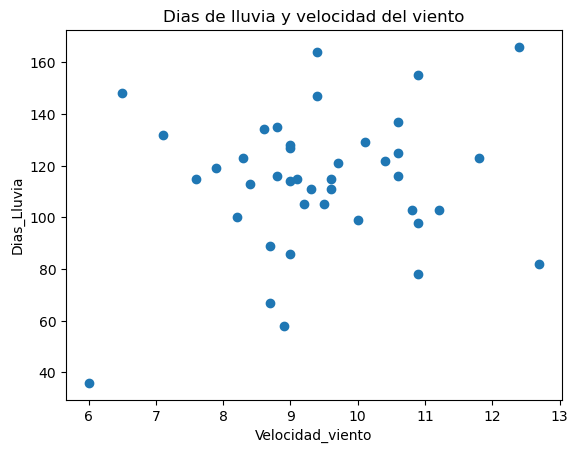

In [5]:
plt.scatter(contaminacion ['Velocidad_viento'], contaminacion ['Dias_Lluvia'])
plt.title ('Dias de lluvia y velocidad del viento')
plt.xlabel('Velocidad_viento')
plt.ylabel('Dias_Lluvia')

Text(0, 0.5, 'Contaminacion_SO2')

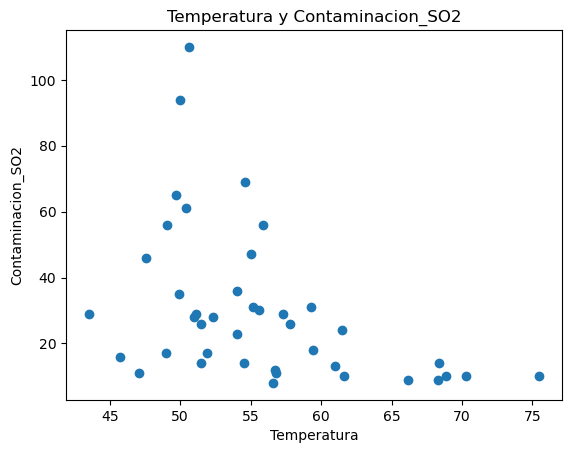

In [6]:
plt.scatter(contaminacion ['Temperatura'], contaminacion ['Contaminacion_SO2'])
plt.title ('Temperatura y Contaminacion_SO2')
plt.xlabel('Temperatura')
plt.ylabel('Contaminacion_SO2')

Text(0, 0.5, 'Habitantes')

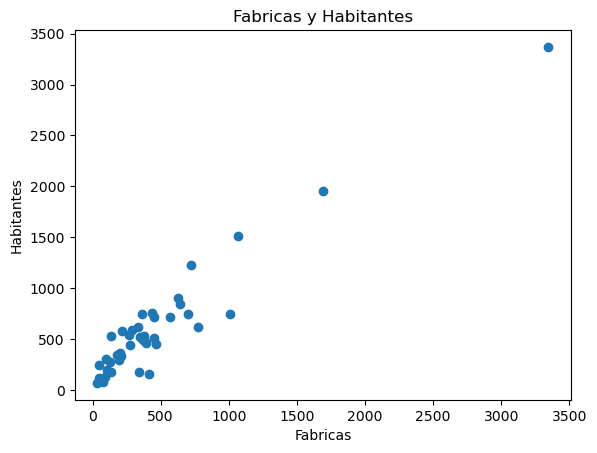

In [7]:
plt.scatter(contaminacion ['Fabricas'], contaminacion ['Habitantes'])
plt.title ('Fabricas y Habitantes')
plt.xlabel('Fabricas')
plt.ylabel('Habitantes')

#### 3. Creamos una grafica que muestre la dispersion de todas las variables

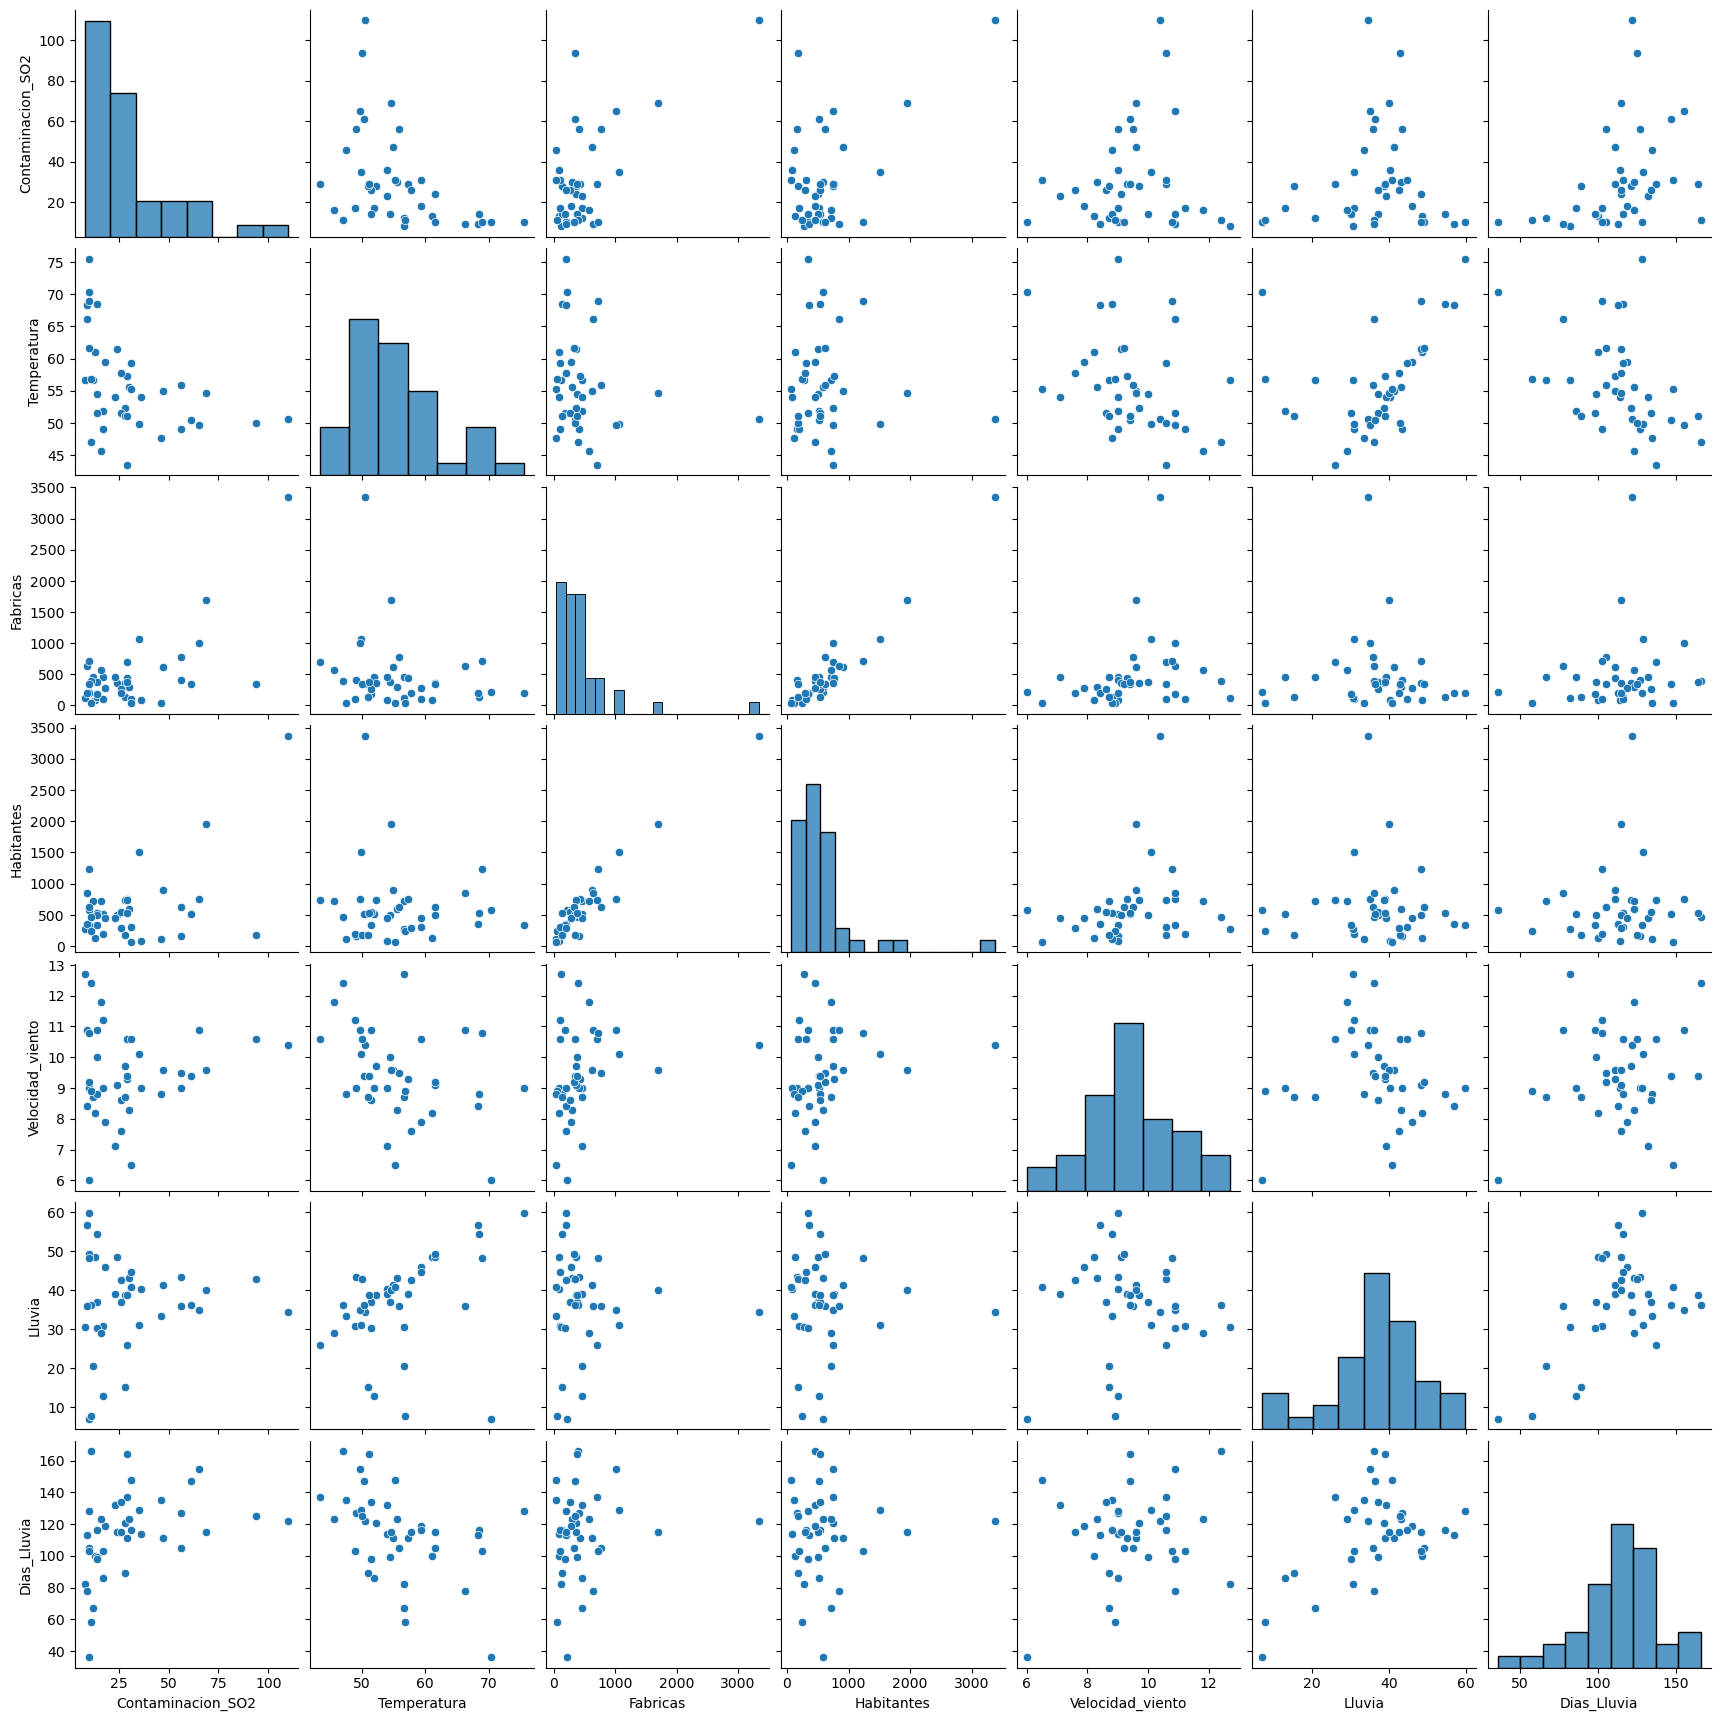

In [8]:
sns.pairplot(contaminacion)

### 4. Probamos la normalidad en las variables 

#### 4.1 Creamos un histograma

(array([ 2.,  1.,  2.,  4., 12.,  7.,  5.,  5.,  1.,  2.]),
 array([ 6.  ,  6.67,  7.34,  8.01,  8.68,  9.35, 10.02, 10.69, 11.36,
        12.03, 12.7 ]),
 <BarContainer object of 10 artists>)

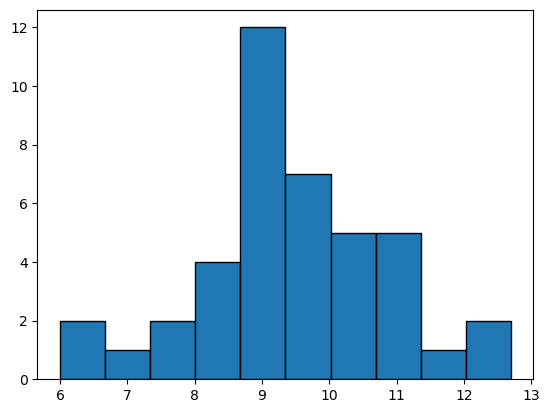

In [9]:
plt.hist(contaminacion[ 'Velocidad_viento'], edgecolor='black', linewidth=1)

##### 4.2 Ceamos un grafico Quantile-Quantile para la Velicidad_Viento

In [10]:
import pylab
import scipy.stats as stats
import numpy as np
from scipy.stats import shapiro

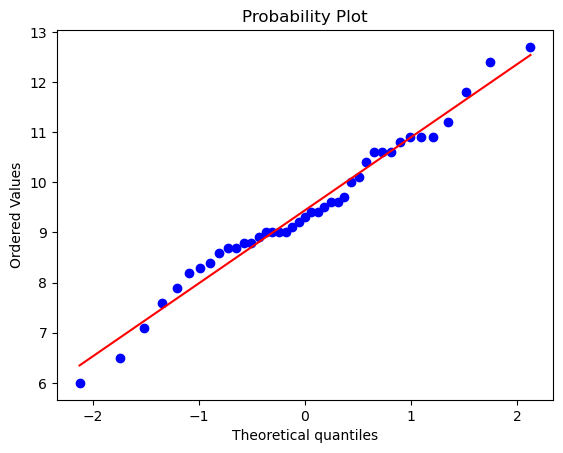

In [11]:
stats.probplot(contaminacion ['Velocidad_viento'], dist="norm", plot=pylab)
pylab.show()

##### 4.3 Aplicamos el test Shapiro-Wilks para probar normalidad

In [12]:
estadistico, p_value= shapiro(contaminacion['Velocidad_viento'])
print (estadistico, p_value)

0.9805736541748047 0.6972602605819702


### 5. Calculamos la correlacion y su significado

In [13]:
contaminacion_corr=contaminacion.corr(method ='spearman')
contaminacion_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
Temperatura,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
Fabricas,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
Habitantes,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
Velocidad_viento,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
Lluvia,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
Dias_Lluvia,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


#### 5.1 Crear un mapa de calor de la correlacion

<Axes: >

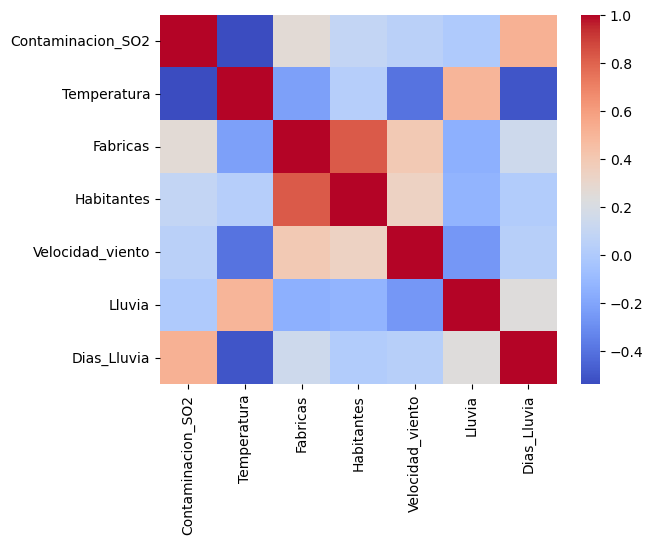

In [14]:
sns.heatmap(contaminacion_corr, xticklabels=contaminacion_corr.columns,  yticklabels=contaminacion_corr.columns, cmap='coolwarm')

In [20]:
import pingouin as pg

In [23]:
corr = pg.pairwise_corr(contaminacion, method='spearman')


In [25]:
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
11,Fabricas,Habitantes,41,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,41,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,41,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,41,-0.505730,7.434618e-04
9,Temperatura,Lluvia,41,0.498650,9.057623e-04
